In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree #the tree is better for Classassification than Regression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier

### Tree and Ensemble Methods

In [3]:
iris_data, iris_labels = load_iris().data, load_iris().target

In [4]:
iris_data.shape

(150, 4)

In [5]:
iris_data_train, iris_data_test, iris_labels_train, iris_labels_test = train_test_split(
    iris_data, iris_labels, train_size = 100
)

In [6]:
iris_data_train.shape, iris_data_test.shape, iris_labels_train.shape, iris_labels_test.shape

((100, 4), (50, 4), (100,), (50,))

In [7]:
tree = DecisionTreeClassifier(
    criterion="entropy",
    min_samples_leaf=5
)

In [8]:
tree.fit(iris_data_train, iris_labels_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)

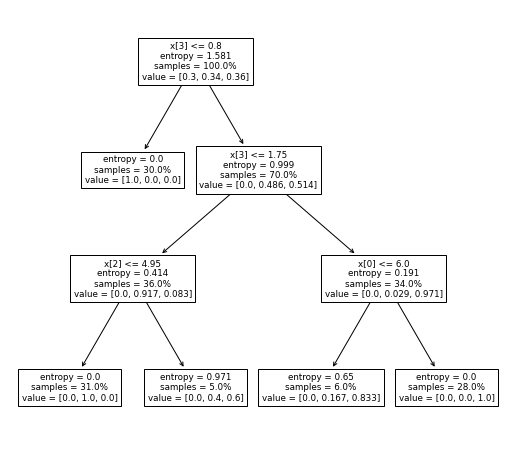

In [9]:
plt.figure(figsize=(9,8))
plot_tree(tree, proportion=True)
plt.show()

In [10]:
tree.feature_importances_

array([0.01746832, 0.        , 0.06725007, 0.91528161])

In [11]:
tree.score(iris_data_train, iris_labels_train)

0.97

In [12]:
tree.score(iris_data_test, iris_labels_test)

0.98

Train - Test data = Variance

Trees cannot be high biased

In [13]:
forest = [
    DecisionTreeClassifier(splitter="random", max_depth=5),
    DecisionTreeClassifier(splitter="random", max_depth=5),
    DecisionTreeClassifier(splitter="random", max_depth=5),
    DecisionTreeClassifier(splitter="random", max_depth=5)
]

In [14]:
forest

[DecisionTreeClassifier(max_depth=5, splitter='random'),
 DecisionTreeClassifier(max_depth=5, splitter='random'),
 DecisionTreeClassifier(max_depth=5, splitter='random'),
 DecisionTreeClassifier(max_depth=5, splitter='random')]

In [15]:
for tree in forest:
    tree.fit(iris_data_train, iris_labels_train)
    print(tree.feature_importances_)

[0.01727955 0.00539986 0.92420911 0.05311148]
[0.05701495 0.00672847 0.26501811 0.67123847]
[0.0035676  0.02695518 0.53659561 0.43288161]
[0.03480497 0.08517344 0.0516896  0.82833199]


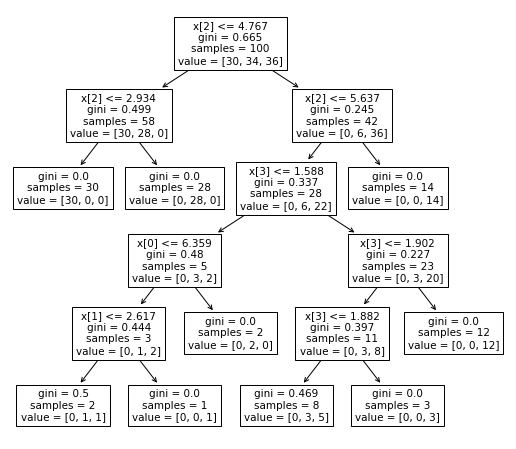

In [16]:
plt.figure(figsize=(9,8))
plot_tree(forest[0])
plt.show()

In [17]:
random_forest = RandomForestClassifier(n_estimators=20)

In [18]:
random_forest.fit(iris_data_train, iris_labels_train)

RandomForestClassifier(n_estimators=20)

In [19]:
random_forest.base_estimator_

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


DecisionTreeClassifier()

In [20]:
random_forest.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=688776137),
 DecisionTreeClassifier(max_features='sqrt', random_state=415811793),
 DecisionTreeClassifier(max_features='sqrt', random_state=1675438253),
 DecisionTreeClassifier(max_features='sqrt', random_state=1827396358),
 DecisionTreeClassifier(max_features='sqrt', random_state=1002606767),
 DecisionTreeClassifier(max_features='sqrt', random_state=949536511),
 DecisionTreeClassifier(max_features='sqrt', random_state=2059576450),
 DecisionTreeClassifier(max_features='sqrt', random_state=1064376880),
 DecisionTreeClassifier(max_features='sqrt', random_state=336829018),
 DecisionTreeClassifier(max_features='sqrt', random_state=1410476984),
 DecisionTreeClassifier(max_features='sqrt', random_state=1861163134),
 DecisionTreeClassifier(max_features='sqrt', random_state=291650481),
 DecisionTreeClassifier(max_features='sqrt', random_state=906619119),
 DecisionTreeClassifier(max_features='sqrt', random_state=1426628649),
 DecisionTre

In [21]:
random_forest.feature_importances_

array([0.0674169 , 0.03235538, 0.39120371, 0.50902402])

In [22]:
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=5000)

In [23]:
ada.fit(iris_data, iris_labels)

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=5000)

In [24]:
ada.score(iris_data_train,iris_labels_train)

0.97

In [25]:
ada.score(iris_data_test, iris_labels_test)

0.98

In [26]:
ada.estimator_errors_

array([0.33333333, 0.06000226, 0.33335537, ..., 0.00036114, 0.3333732 ,
       0.00036114])

In [27]:
set(ada.estimator_weights_)

{1.0}